# CATEGORICAL DATA HANDLING:

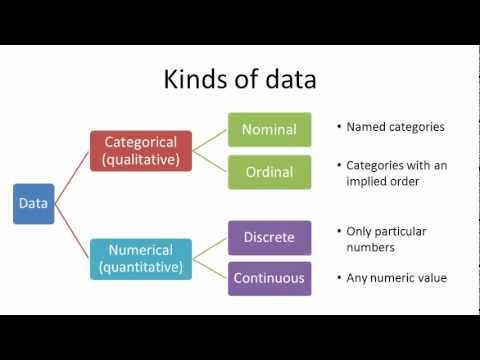

### NOMINAL VARIABLE: without any particular implied order like say color of eyes-Black,blue,green,brown. There  is no ranking or ordering to the colors


### person's gender,marital status,hometown,or the types of movies....


### *ORDINAL CATEGORICAL*: it occurs with a natural ordering.


### like size(S,M,L) ,exam grades,movies ratings...


### DISCRETE DATA: represent items that can be counted;


### CONTINOUS DATA: has infinite no of possible values.

# Create DataFrame: 

In [1]:
import pandas as pd

In [2]:
df=pd.DataFrame([['green','L',10.30,'class1'],['red','M',12.30,'class2'],['blue','XL',18.30,'class3']])
df.columns=['color','size','Price','Target']
df
# Target column is always ordinal
# so we will apply LABEL ENCODING on this column 

,color,size,Price,Target
0,green,L,10.3,class1
1,red,M,12.3,class2
2,blue,XL,18.3,class3


## XL>L>M then make sense (Ordinal Data) 

## green>red>blue....no comparision possible i.e does not make any sense (Nominal Data)

In [3]:
size_mapping ={'M':1,'L':2,'XL':3}

# FROM PANDAS
### label encoding:  (use in target column)


In [4]:
df['size']=df['size'].map(size_mapping)
df

,color,size,Price,Target
0,green,2,10.3,class1
1,red,1,12.3,class2
2,blue,3,18.3,class3


### one hot encoding:  (use in feature column)

In [5]:
#df.columns[-1]
df2=pd.get_dummies(df[df.columns[:-1]])
df2

,size,Price,color_blue,color_green,color_red
0,2,10.3,0,1,0
1,1,12.3,0,0,1
2,3,18.3,1,0,0


### one hot encoding  applies only in input data / FEATURES:  (feature will be always 2D)
### Label encoding applies only in output data / TARGET :         (target will be 1D)

In [6]:
df2['target']=df.Target.map({'class1':0,'class2':1,'class3':2})
df2

,size,Price,color_blue,color_green,color_red,target
0,2,10.3,0,1,0,0
1,1,12.3,0,0,1,1
2,3,18.3,1,0,0,2


# From SKLEARN
### LABEL ENCODING: 

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labels=['setosa','versicolor','virginica']

In [9]:
labels

['setosa', 'versicolor', 'virginica']

### fit_transform() = Train the model 

In [10]:
encoder=LabelEncoder()

encoder.fit_transform(labels)

array([0, 1, 2], dtype=int64)

### transform() = Test the model 

In [11]:
labels1=['versicolor','setosa','virginica','setosa','versicolor']

In [12]:
new_labels=encoder.transform(labels1)

In [13]:
new_labels

array([1, 0, 2, 0, 1])

### One hot encoding       (in another Data)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [16]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [17]:
x=df.iloc[:,:-1].values               #x for input
y=df.iloc[:,-1].values                #y for output

In [18]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [19]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [20]:
# missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

x[:,1:3]=imputer.fit_transform(x[:,1:3])
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [21]:
x.shape

(10, 3)

### astype(int)  = converts float into integer(int) 

In [22]:
x[:,1:3]=x[:,1:3].astype(int)
x

array([['France', 44, 72000],
       ['Spain', 27, 48000],
       ['Germany', 30, 54000],
       ['Spain', 38, 61000],
       ['Germany', 40, 63777],
       ['France', 35, 58000],
       ['Spain', 38, 52000],
       ['France', 48, 79000],
       ['Germany', 50, 83000],
       ['France', 37, 67000]], dtype=object)

In [23]:
x.shape

(10, 3)

#### Unique() = finds all unique data

In [24]:
df.Country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### now applying one hot encoding: 

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#country column
ct=ColumnTransformer([('Country',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)

In [26]:
x

array([[1.0, 0.0, 0.0, 44, 72000],
       [0.0, 0.0, 1.0, 27, 48000],
       [0.0, 1.0, 0.0, 30, 54000],
       [0.0, 0.0, 1.0, 38, 61000],
       [0.0, 1.0, 0.0, 40, 63777],
       [1.0, 0.0, 0.0, 35, 58000],
       [0.0, 0.0, 1.0, 38, 52000],
       [1.0, 0.0, 0.0, 48, 79000],
       [0.0, 1.0, 0.0, 50, 83000],
       [1.0, 0.0, 0.0, 37, 67000]], dtype=object)

In [27]:
type(x)

numpy.ndarray

In [28]:
df1=pd.DataFrame(x,columns=['France','Germany','Spain','Age','Salary'])
df1

,France,Germany,Spain,Age,Salary
0,1.0,0.0,0.0,44,72000
1,0.0,0.0,1.0,27,48000
2,0.0,1.0,0.0,30,54000
3,0.0,0.0,1.0,38,61000
4,0.0,1.0,0.0,40,63777
5,1.0,0.0,0.0,35,58000
6,0.0,0.0,1.0,38,52000
7,1.0,0.0,0.0,48,79000
8,0.0,1.0,0.0,50,83000
9,1.0,0.0,0.0,37,67000


In [29]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [30]:
label_y= LabelEncoder()
y=label_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])